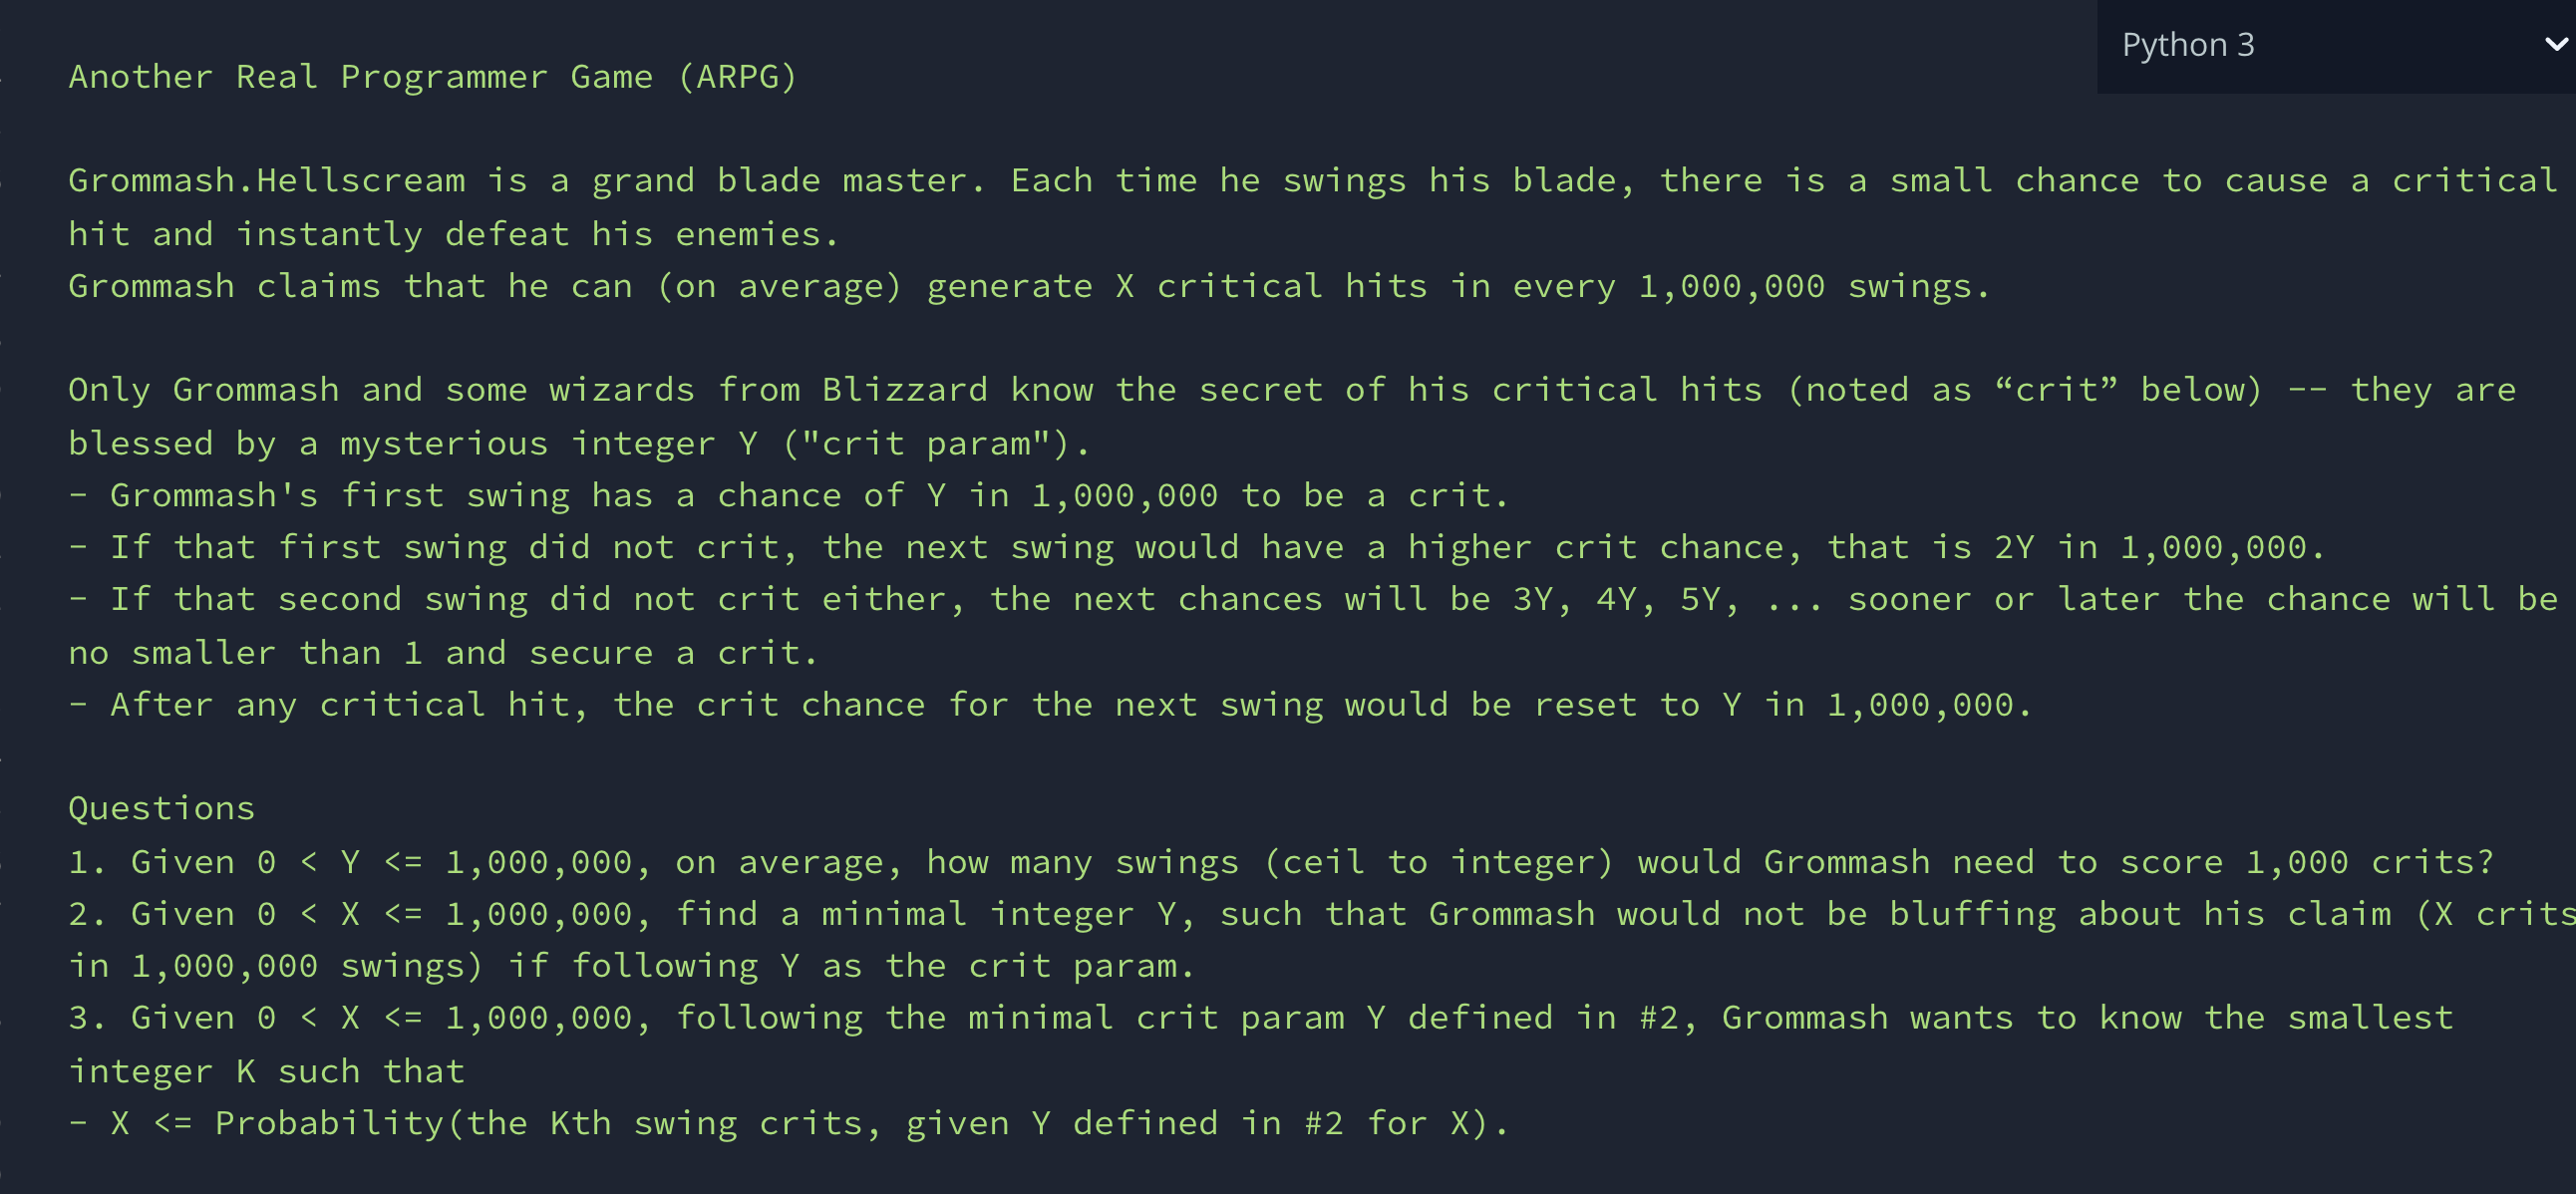

In [1]:
from IPython.display import Image
Image('./interview_q1.png')

# Q1 
E(num swings to score 1000 crits)= 1000* E(num swings to score 1 crit) 
due to the independence of crit, we need to get Expectation of socre 1 crit. The expectation is function of Y

### E(score 1 crit)= 1* Y_prob + (1-Y_prob)*2*Y_prob*2 + ... ( unitil k*Y_prob>=1)

In [14]:
#Q1 code
def expectation_get_1_crit(Y):
    Y_prob=Y/10**6
    count=1
    Expectation=0
    not_finished_prob=1
    while count*Y_prob<=1:
        Expectation+= count*(not_finished_prob)*count*Y_prob
        
        not_finished_prob*= (1-count*Y_prob)
        count+=1
    return Expectation
    

### Q2 aim to find min Y s.t. 1/expectation_get_1_crit x 10**6>=X 
mean the expectation of swing 10**6 great than X

In [42]:
## binary search
#find the first Y s.t. expectation_get_1_crit>=10**6/X
def min_Y_not_bluff(X):
    l,r=1, 10**6
    while l<r:
        mid=(l+r)//2
        #print(mid)
        if expectation_get_1_crit(mid)*X<=10**6:
            r=mid
        else:
            l=mid+1
    return l

# Q3
### P(1st crit)= prob_Y
### P(2nd crit)= P(2nd crit and 1st crit) + P(2nd crit and 1st not crit)= Y_prob*Y_prob+ (1-Y_prob)*2Y_prob
### P(Kth crit)= P(Kth crit|K-1 crit)+ P(Kth crit | K-2 crit) + .....P(Kth crit| K- n crit) 
### where n is the fist n*Y_prob>=1

In [85]:
## P(kth crit| k-i crit)= P(k-i+1 to k-1 did not crit and kth crit)* P(k-i crit)
## function to get each swing's probability
d={}
def prob(Y,K):
    Y_prob=Y/10**6
    if K in d: return d[K]
    if K==0: return 1
    if K==1: return Y_prob
    
    ans=0
    n=0 ## n is number of swing did not crit
    while n*Y_prob<1 and n<K:
        ans+= prob_did_crit_for_n(n,Y_prob)*min((n+1)*Y_prob,1)*prob(Y,K-n-1)
        n+=1
    d[K]=ans
    return ans
def prob_did_crit_for_n(n,Y_prob):
    if n*Y_prob>=1: return 0
    ans=1
    for i in range(1,n+1):
        ans*= (1-i*Y_prob)
    return ans
    

In [86]:
n=1
Y_prob=0.1
Y=10**5
prob_did_crit_for_n(n,0.1)*min((n+1)*Y_prob,1)*prob(Y,2-n-1)

0.18000000000000002

In [80]:
001 011 101 111
(1-0.1)*(1-0.2)*0.3+(1-0.1)*0.2*0.1+0.1*(1-0.2)*0.


0.019000000000000003

0.19000000000000003